In [1]:
pwd

'E:\\DataScience\\MachineLearning\\Snake_Date'

In [2]:
path ='E:\\DataScience\\MachineLearning\\Snake_Date'

In [3]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'ConservationStatusofWorldSnakes.csv',
 'Snake ~ Data Insights  .ipynb']

In [4]:
#Importing Some Library
import os
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import pandas as pd
import numpy as np
from scipy import signal
from wordcloud import WordCloud, STOPWORDS
import plotly.io as pio
pio.templates.default = "plotly_dark"

#to supress warning
import warnings
warnings.filterwarnings('ignore')

#to make shell more intractive
from IPython.display import display
from IPython.display import Image

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [6]:
#read csv file
df = pd.read_csv(path+"\\ConservationStatusofWorldSnakes.csv")

In [7]:
#data 
df

Family             Scientific name  \
0     BOLYERIDAE      Bolyeria multocarinata   
1     DIPSADIDAE  Borikenophis sanctaecrucis   
2    TYPHLOPIDAE             Typhlops cariei   
3       ELAPIDAE    Aipysurus apraefrontalis   
4       ELAPIDAE       Aipysurus foliosquama   
..           ...                         ...   
244  TYPHLOPIDAE          Typhlops syntherus   
245    VIPERIDAE               Vipera barani   
246    VIPERIDAE              Vipera lotievi   
247    VIPERIDAE            Vipera monticola   
248    VIPERIDAE      Vipera transcaucasiana   

                              Common name(s) Red List status Population trend  
0                 Round Island Burrowing Boa              EX              NaN  
1                          Saint Croix Racer              EX              NaN  
2                                        NaN              EX              NaN  
3    Sahul Reef Snake, Short-nosed Sea Snake              CR       decreasing  
4                      Leaf-scaled Sea Snake              CR       decreasing  
..                                       ...             ...              ...  
244            Barahona Peninsula Blindsnake              NT          unknown  
245                                      NaN              NT       decreasing  
246                           Lotiev's Viper              NT       decreasing  
247                        Atlas Dwarf Viper              NT       decreasing  
248          Transcaucasian Long-nosed Viper              NT       decreasing  

[249 rows x 5 columns]

In [10]:
#Diff. Family-Name of Snake available in this data 
df['Family'].unique()

array(['BOLYERIDAE', 'DIPSADIDAE', 'TYPHLOPIDAE', 'ELAPIDAE', 'VIPERIDAE',
       'CALAMARIIDAE', 'COLUBRIDAE', 'PSEUDOXYRHOPHIIDAE', 'NATRICIDAE',
       'PROSYMNIDAE', 'PYTHONIDAE', 'HOMALOPSIDAE', 'BOIDAE',
       'LAMPROPHIIDAE', 'XENOSAURIDAE', 'XENODERMATIDAE',
       'AMPHISBAENIDAE', 'UROPELTIDAE'], dtype=object)

In [11]:
#No. of Diff. Family of Snake available in this data
df['Family'].nunique()

18

In [12]:
fig = px.pie(df, values=df['Family'].value_counts(), names=df['Family'].value_counts().index
             , title="Families of Snakes")
fig.show()

In [13]:
print(df['Population trend'].nunique())
print(df['Population trend'].unique())
print(df['Population trend'].value_counts())

4
[nan 'decreasing' 'increasing' 'stable' 'unknown']
decreasing    118
unknown        90
stable         10
increasing      1
Name: Population trend, dtype: int64


In [22]:
fig = px.bar(df,x=df['Population trend'].value_counts().index,y=df['Population trend'].value_counts(),
             color=df['Population trend'].value_counts().index,title="Population trend ")
fig.update_xaxes(title_text='Rate')
fig.update_yaxes(title_text='Count of Numbers')
fig.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Family            249 non-null    object
 1   Scientific name   249 non-null    object
 2   Common name(s)    174 non-null    object
 3   Red List status   249 non-null    object
 4   Population trend  219 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [16]:
df.describe()

Family       Scientific name     Common name(s) Red List status  \
count         249                   249                174             249   
unique         18                   249                174               5   
top     VIPERIDAE  Amphiesma taronensis  Chinese Sea Snake              VU   
freq           56                     1                  1              86   

       Population trend  
count               219  
unique                4  
top          decreasing  
freq                118

Family               0
Scientific name      0
Common name(s)      75
Red List status      0
Population trend    30
dtype: int64


<AxesSubplot:>

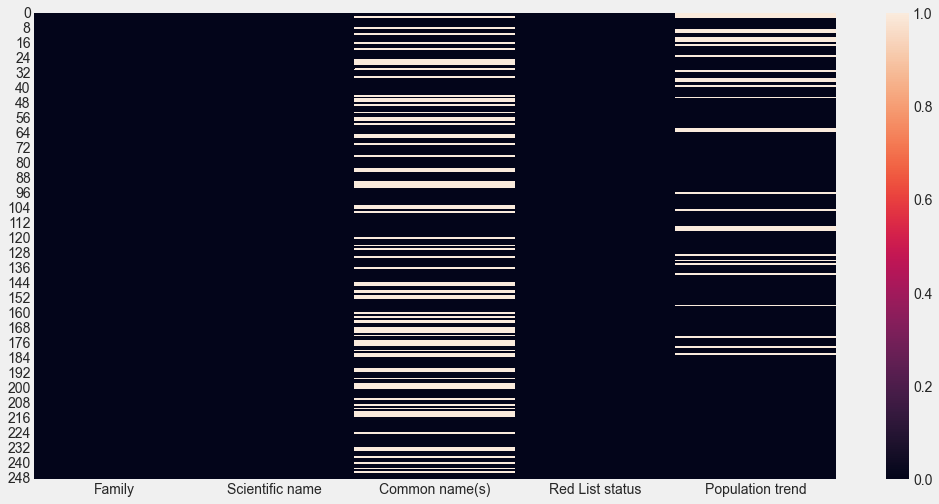

In [17]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [18]:
#replacing the NAN of Name-not-found in Colum - Common names(s)
df['Common name(s)'].fillna('Name-not-found',inplace=True)

In [21]:
print(df.isnull().sum())

Family               0
Scientific name      0
Common name(s)       0
Red List status      0
Population trend    30
dtype: int64


In [23]:
#replacing the NAN with unkown in Column - Population trend
df['Population trend'].fillna('unknown',inplace=True)

In [24]:
fig = px.bar(df,x=df['Population trend'].value_counts().index,y=df['Population trend'].value_counts(),
             color=df['Population trend'].value_counts().index,title="Population trend ")
fig.update_xaxes(title_text='Rate')
fig.update_yaxes(title_text='Count of Numbers')
fig.show()

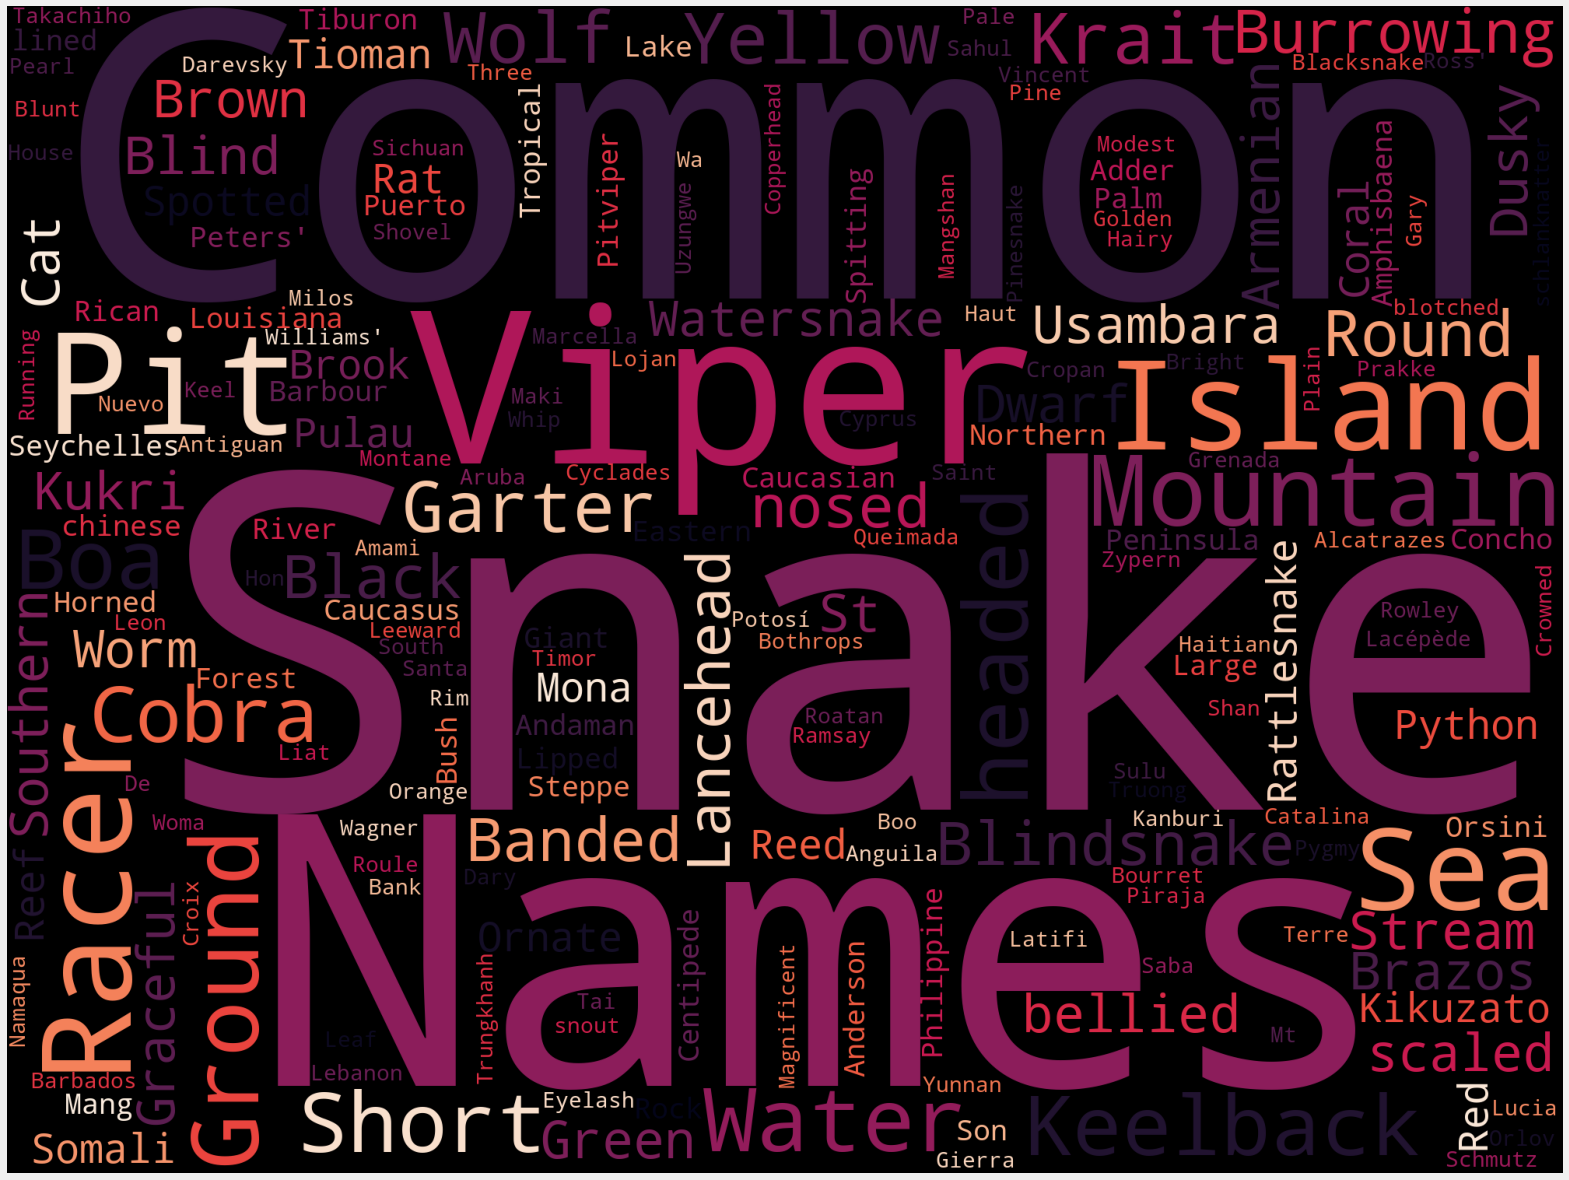

In [20]:
text =" Snake Common Names ".join(cat for cat in df['Common name(s)'])
stop_words = list(STOPWORDS) + ["NaN","Name-not-found","found","Name"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', 
                      colormap='rocket_r', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
df['Red List status'].unique()

array(['EX', 'CR', 'EN', 'VU', 'NT'], dtype=object)

In [31]:
df['Red List status'].value_counts()

VU    86
EN    74
NT    58
CR    28
EX     3
Name: Red List status, dtype: int64

In [60]:
## all data of those snake who is Extint 
df.loc[df['Red List status'] == 'EX']

Family             Scientific name              Common name(s)  \
0   BOLYERIDAE      Bolyeria multocarinata  Round Island Burrowing Boa   
1   DIPSADIDAE  Borikenophis sanctaecrucis           Saint Croix Racer   
2  TYPHLOPIDAE             Typhlops cariei              Name-not-found   

  Red List status Population trend  
0              EX          unknown  
1              EX          unknown  
2              EX          unknown

In [83]:
df.loc[df['Red List status'] == 'CR']

Family               Scientific name  \
3             ELAPIDAE      Aipysurus apraefrontalis   
4             ELAPIDAE         Aipysurus foliosquama   
5           DIPSADIDAE             Alsophis antiguae   
6            VIPERIDAE         Bothropoides alcatraz   
7            VIPERIDAE        Bothropoides insularis   
8         CALAMARIIDAE              Calamaria ingeri   
9         CALAMARIIDAE             Calamaria prakkei   
10          COLUBRIDAE            Chironius vincenti   
11  PSEUDOXYRHOPHIIDAE            Compsophis vinckei   
12           VIPERIDAE         Crotalus catalinensis   
13           VIPERIDAE             Crotalus unicolor   
14          COLUBRIDAE         Gongylosoma mukutense   
15          DIPSADIDAE            Hypsirhynchus ater   
16          COLUBRIDAE         Lampropeltis herrerae   
17          DIPSADIDAE                Liophis cursor   
18          COLUBRIDAE        Lycodon chrysoprateros   
19          COLUBRIDAE          Masticophis anthonyi   
20            ELAPIDAE             Micrurus ruatanus   
21           VIPERIDAE           Montivipera wagneri   
22          COLUBRIDAE             Oligodon booliati   
23          NATRICIDAE       Opisthotropis kikuzatoi   
24         PROSYMNIDAE          Prosymna ornatissima   
25  PSEUDOXYRHOPHIIDAE  Pseudoxyrhopus ankafinaensis   
26         TYPHLOPIDAE              Typhlops lazelli   
27           VIPERIDAE              Vipera anatolica   
28           VIPERIDAE              Vipera darevskii   
29           VIPERIDAE                 Vipera orlovi   
30         TYPHLOPIDAE      Xenotyphlops grandidieri   

                                    Common name(s) Red List status  \
3          Sahul Reef Snake, Short-nosed Sea Snake              CR   
4                            Leaf-scaled Sea Snake              CR   
5                                   Antiguan Racer              CR   
6                             Alcatrazes Lancehead              CR   
7       Golden Lancehead, Queimada Island Bothrops              CR   
8                                   Name-not-found              CR   
9                              Prakke's Reed Snake              CR   
10                           St Vincent Blacksnake              CR   
11                                  Name-not-found              CR   
12               Santa Catalina Island Rattlesnake              CR   
13                        Aruba Island Rattlesnake              CR   
14                       Pulau Tioman Ground Snake              CR   
15                                     Black Racer              CR   
16                                  Name-not-found              CR   
17                         Lacépède's Ground Snake              CR   
18                                Ross' Wolf Snake              CR   
19                                  Name-not-found              CR   
20                              Roatan Coral Snake              CR   
21                                  Wagner's Viper              CR   
22                          Boo-Liat's Kukri Snake              CR   
23  Kikuzato's Brook Snake, Kikuzatos Stream Snake              CR   
24                             Ornate Shovel-snout              CR   
25                                  Name-not-found              CR   
26                                  Name-not-found              CR   
27                                  Name-not-found              CR   
28                                Darevsky's Viper              CR   
29                                   Orlov's Viper              CR   
30                                  Name-not-found              CR   

   Population trend  
3        decreasing  
4        decreasing  
5        increasing  
6            stable  
7            stable  
8           unknown  
9           unknown  
10          unknown  
11       decreasing  
12       decreasing  
13          unknown  
14          unknown  
15          unknown  
16       decreasing  
17          unknown  
18      

In [39]:
## Family wise max snake scientific name ::
print(df.groupby('Family')['Scientific name'].max())

Family
AMPHISBAENIDAE               Amphisbaena schmidti
BOIDAE                        Epicrates subflavus
BOLYERIDAE                     Casarea dussumieri
CALAMARIIDAE              Pseudorabdion talonuran
COLUBRIDAE                Tetralepis fruhstorferi
DIPSADIDAE                     Trimetopon slevini
ELAPIDAE                   Sinomicrurus japonicus
HOMALOPSIDAE                      Enhydris vorisi
LAMPROPHIIDAE                   Lycophidion nanus
NATRICIDAE              Tropidonophis negrosensis
PROSYMNIDAE                  Prosymna ornatissima
PSEUDOXYRHOPHIIDAE          Thamnosophis stumpffi
PYTHONIDAE                       Python kyaiktiyo
TYPHLOPIDAE              Xenotyphlops grandidieri
UROPELTIDAE                Rhinophis drummondhayi
VIPERIDAE             Viridovipera truongsonensis
XENODERMATIDAE                  Achalinus werneri
XENOSAURIDAE                 Xenosaurus platyceps
Name: Scientific name, dtype: object


In [40]:
## Family wise min snake scientific name ::
print(df.groupby('Family')['Scientific name'].min())

Family
AMPHISBAENIDAE          Amphisbaena hyporissor
BOIDAE                       Corallus cropanii
BOLYERIDAE              Bolyeria multocarinata
CALAMARIIDAE                  Calamaria ingeri
COLUBRIDAE                      Boiga bourreti
DIPSADIDAE                    Adelphicos daryi
ELAPIDAE              Aipysurus apraefrontalis
HOMALOPSIDAE               Cerberus microlepis
LAMPROPHIIDAE           Lamprophis geometricus
NATRICIDAE                     Adelophis copei
PROSYMNIDAE               Prosymna ornatissima
PSEUDOXYRHOPHIIDAE        Alluaudina mocquardi
PYTHONIDAE                   Aspidites ramsayi
TYPHLOPIDAE               Afrotyphlops gierrai
UROPELTIDAE             Rhinophis drummondhayi
VIPERIDAE               Agkistrodon bilineatus
XENODERMATIDAE               Achalinus werneri
XENOSAURIDAE                Xenosaurus grandis
Name: Scientific name, dtype: object


In [42]:
## Family wise Count of  snake (scientific name) available ::
print(df.groupby('Family')['Scientific name'].count())

Family
AMPHISBAENIDAE         2
BOIDAE                 3
BOLYERIDAE             2
CALAMARIIDAE           6
COLUBRIDAE            40
DIPSADIDAE            30
ELAPIDAE              29
HOMALOPSIDAE           3
LAMPROPHIIDAE          2
NATRICIDAE            22
PROSYMNIDAE            1
PSEUDOXYRHOPHIIDAE    31
PYTHONIDAE             3
TYPHLOPIDAE           14
UROPELTIDAE            1
VIPERIDAE             56
XENODERMATIDAE         1
XENOSAURIDAE           3
Name: Scientific name, dtype: int64


In [76]:
fig = px.bar(df,x=df.groupby('Family')['Scientific name'].count( ).index,y=df.groupby('Family')['Scientific name'].count(),
             color=df.groupby('Family')['Scientific name'].count().index,title="Family wise Count of Snake")
fig.update_xaxes(title_text='Family-names of Snake')
fig.update_yaxes(title_text='Count of Snakes in each family')
fig.show()

In [95]:
fig = px.sunburst(df,path=['Family','Red List status'],
                 color_discrete_sequence =px.colors.qualitative.Dark24,
                 title = 'Family ~ Red List Status')
fig.show()

In [97]:
fig = px.sunburst(df,path=['Red List status','Population trend'],
                 color_discrete_sequence =px.colors.qualitative.Dark24,
                 title = 'Red List status ~ Population Trend')
fig.show()

In [98]:
fig = px.sunburst(df,path=['Family','Population trend'],
                 color_discrete_sequence =px.colors.qualitative.Dark24,
                 title = 'Family ~ Population Trend')
fig.show()

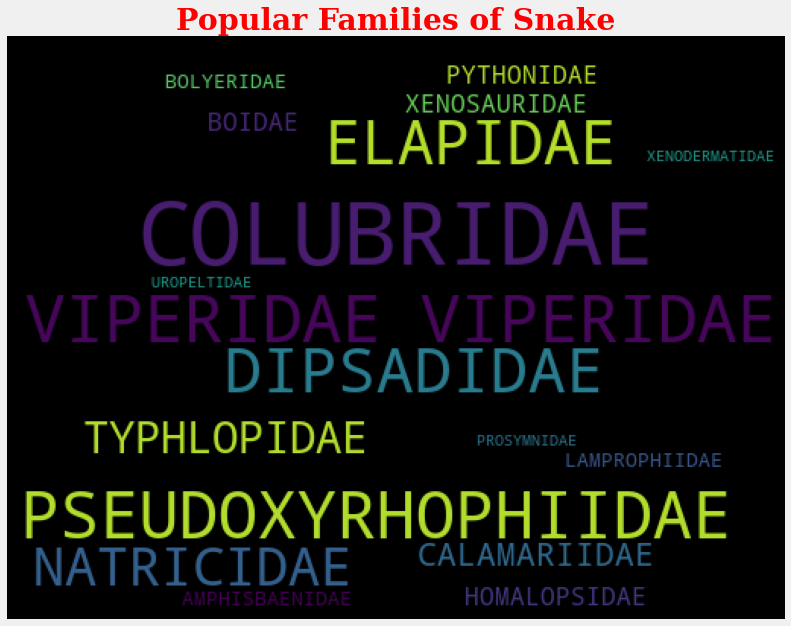

In [102]:
groups = df['Family'].dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'Black',
                     width = 512,
                     height = 384,).generate(' '.join(groups))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Popular Families of Snake', 
        fontdict={'family': 'serif',
        'color':  'red',
        'weight': 'bold',
        'size': 30,})
plt.show()

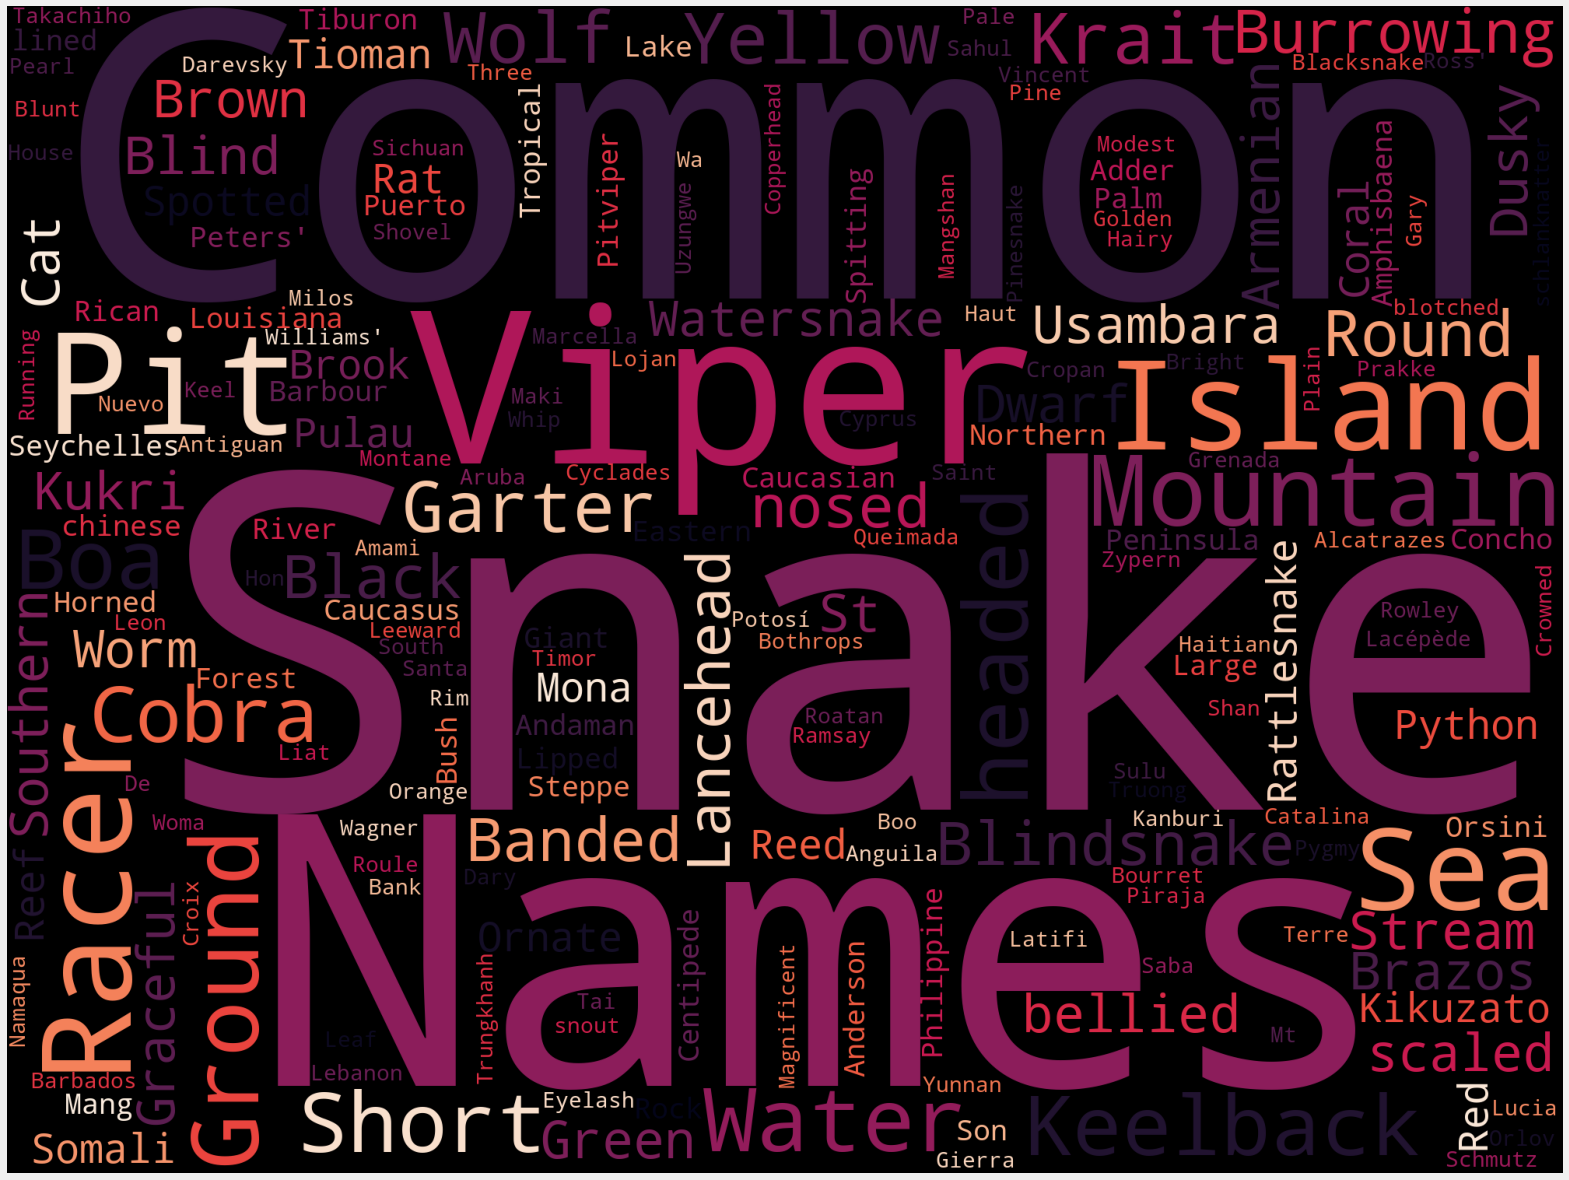

In [100]:
text =" Snake Common Names ".join(cat for cat in df['Common name(s)'])
stop_words = list(STOPWORDS) + ["NaN","Name-not-found","found","Name"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', 
                      colormap='rocket_r', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()